* Avoid using exceptions as much as possible. <br>
* For invalid input values, there are other ways to validate the input instead of using exception handling.<br>
* We will take a look at those ways later in this sheet.<br>


In [ ]:
try{

    try{
        throw new ArgumentNullException();
    }catch(ArgumentNullException ex){
        Console.WriteLine("Exception A");
        throw; // causes the control to go to the outer scope.
    }catch(Exception ex){
        Console.WriteLine("Exception B");
    }
}catch(Exception e){
    Console.WriteLine("Exception C");
}

In [ ]:
try{
    string userInput = "12as";
    int? value = ParseStringToInt(userInput);

    Console.WriteLine("Parsing done successfully");
}catch(Exception ex){
    Console.WriteLine("Excpetion has occrued.");
}

int? ParseStringToInt(string str){
    int? val = null;
    try{
        val = int.Parse(str);
        
    }catch(Exception ex){
        Console.WriteLine($"Parsing error occrued in the method, {nameof(ParseStringToInt)}");
        throw;
    }
    return val;
}

In [ ]:
try{

}catch // without Exception Object. It is still valid and will catch every exception.
{

}

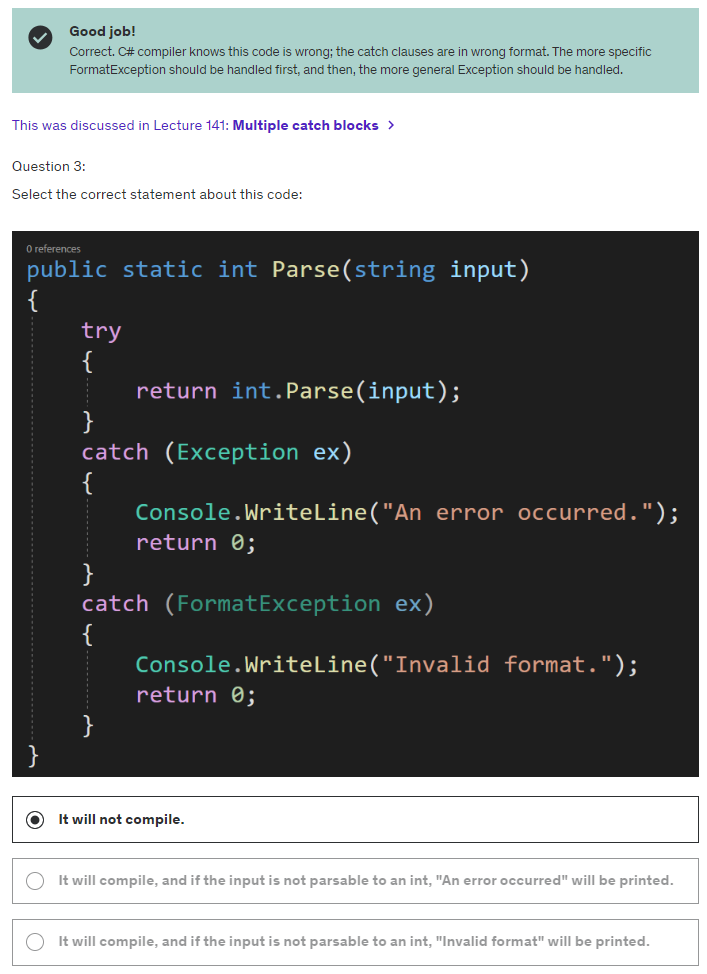

* Throwing an exception allows us not to return a value from a method.
* It is not the responsiblity of the method to handle the invalid input. But the user of this method should take the responsibility of giving the right input. The method will just throw the exception if it receives the invalid input. Just like when non-parsable string is passed to int.Parse() it throws an exception instead of handling it. This is the general rule of thumb to decide <strong>where to apply the exception handling. </strong>

In [ ]:
int GetFirstElement(IEnumerable<int> numbers){
    return numbers.ElementAt(0); // Index out of range when numbers collection is empty.
}

In [ ]:
int GetFirstElement(IEnumerable<int> numbers){
    foreach(var number in numbers)
    {
        return number;
    }
    // return 0; // Not the right solution. If the numbers is empty, 0 will be returned. Which is not the first element apparently.
    throw new Exception("The collection can not be empty.");
}

In [ ]:
try{
    GetFirstElement(new List<int>()); // Throws exception since List is empty.
}catch{
    Console.WriteLine("Bad Happened");
}

Console.WriteLine("When not catching the Exception after it has been thrown following happens");

GetFirstElement(new List<int>(5));

In [ ]:
GetFirstElement(new List<int>{1,2,3,4,5}); // runs successfully since the list is non-empty.

In [ ]:
// var val = GetFirstElement(new List<int>{});
// Console.WriteLine(val);

List<int> numbers = null;
foreach(var number in numbers) // null reference Exception is thrown when numbers is null.
{
    Console.WriteLine(number);
}

* We should choose the type of exception as specific as possible to our case.
* If we dont find any relevant built in exception type of our use case, we can create our own.



* Catching an exception of type System.Exception is always considered a bad idea.


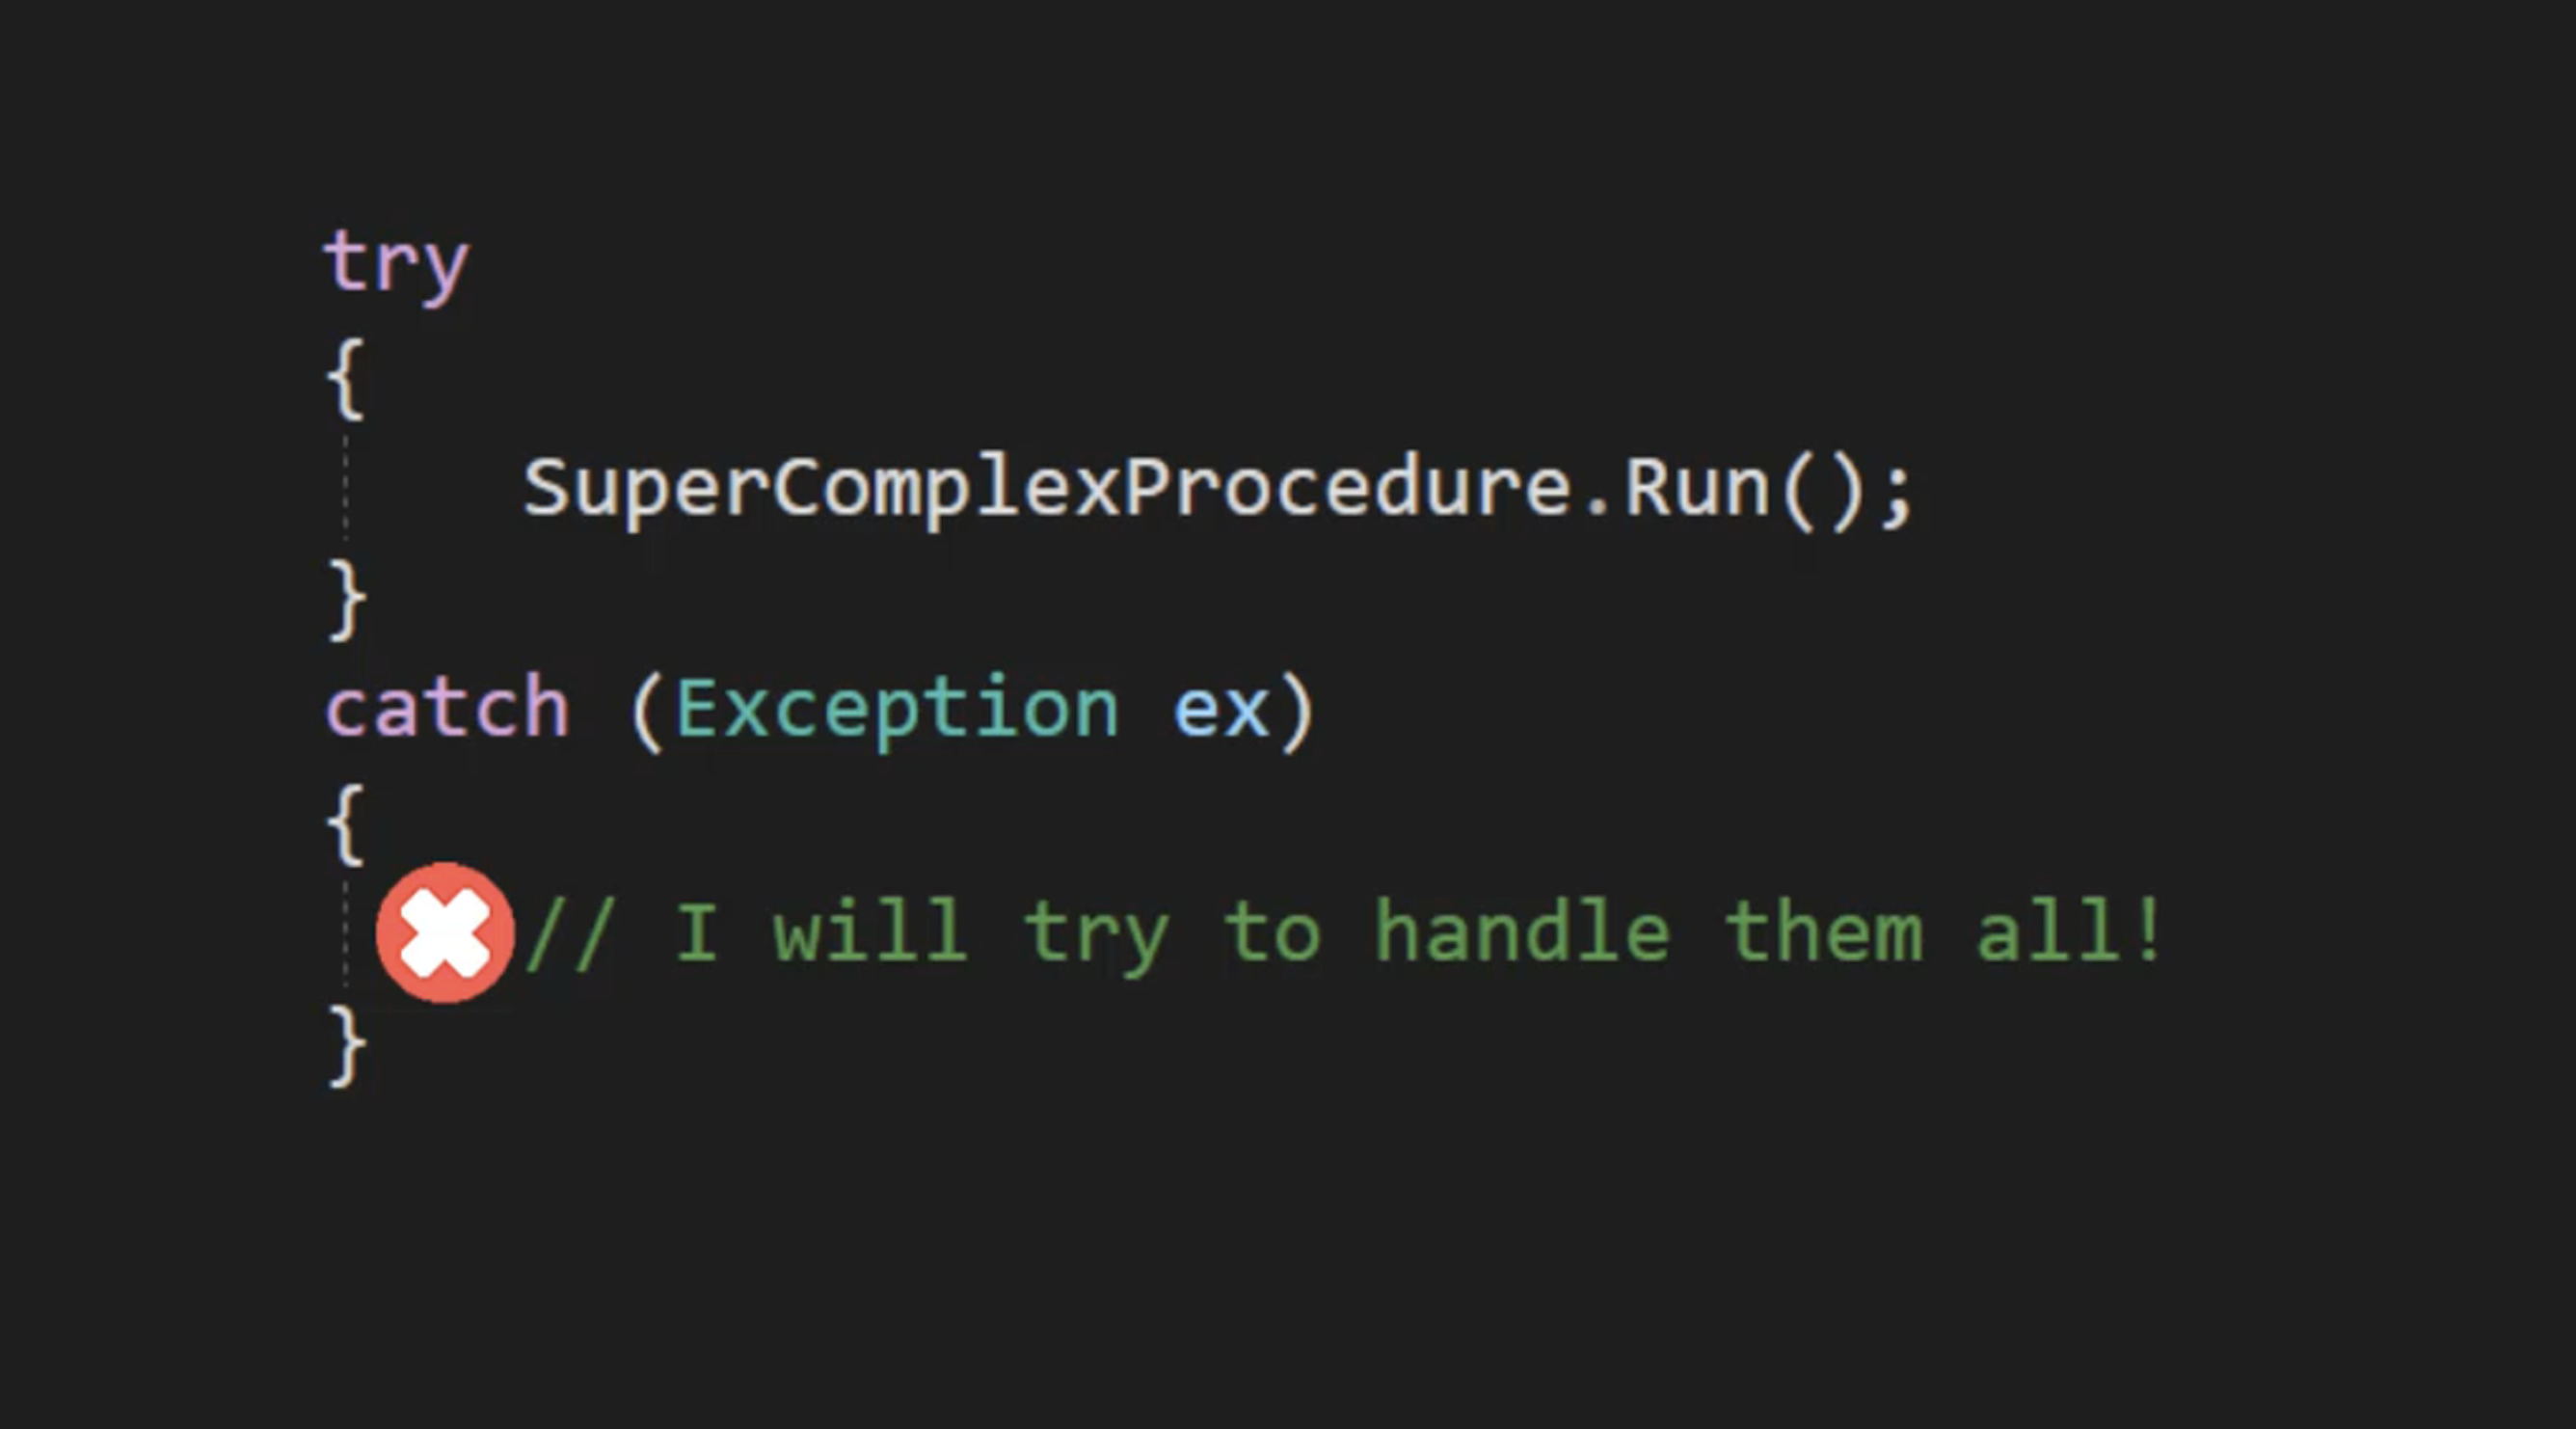


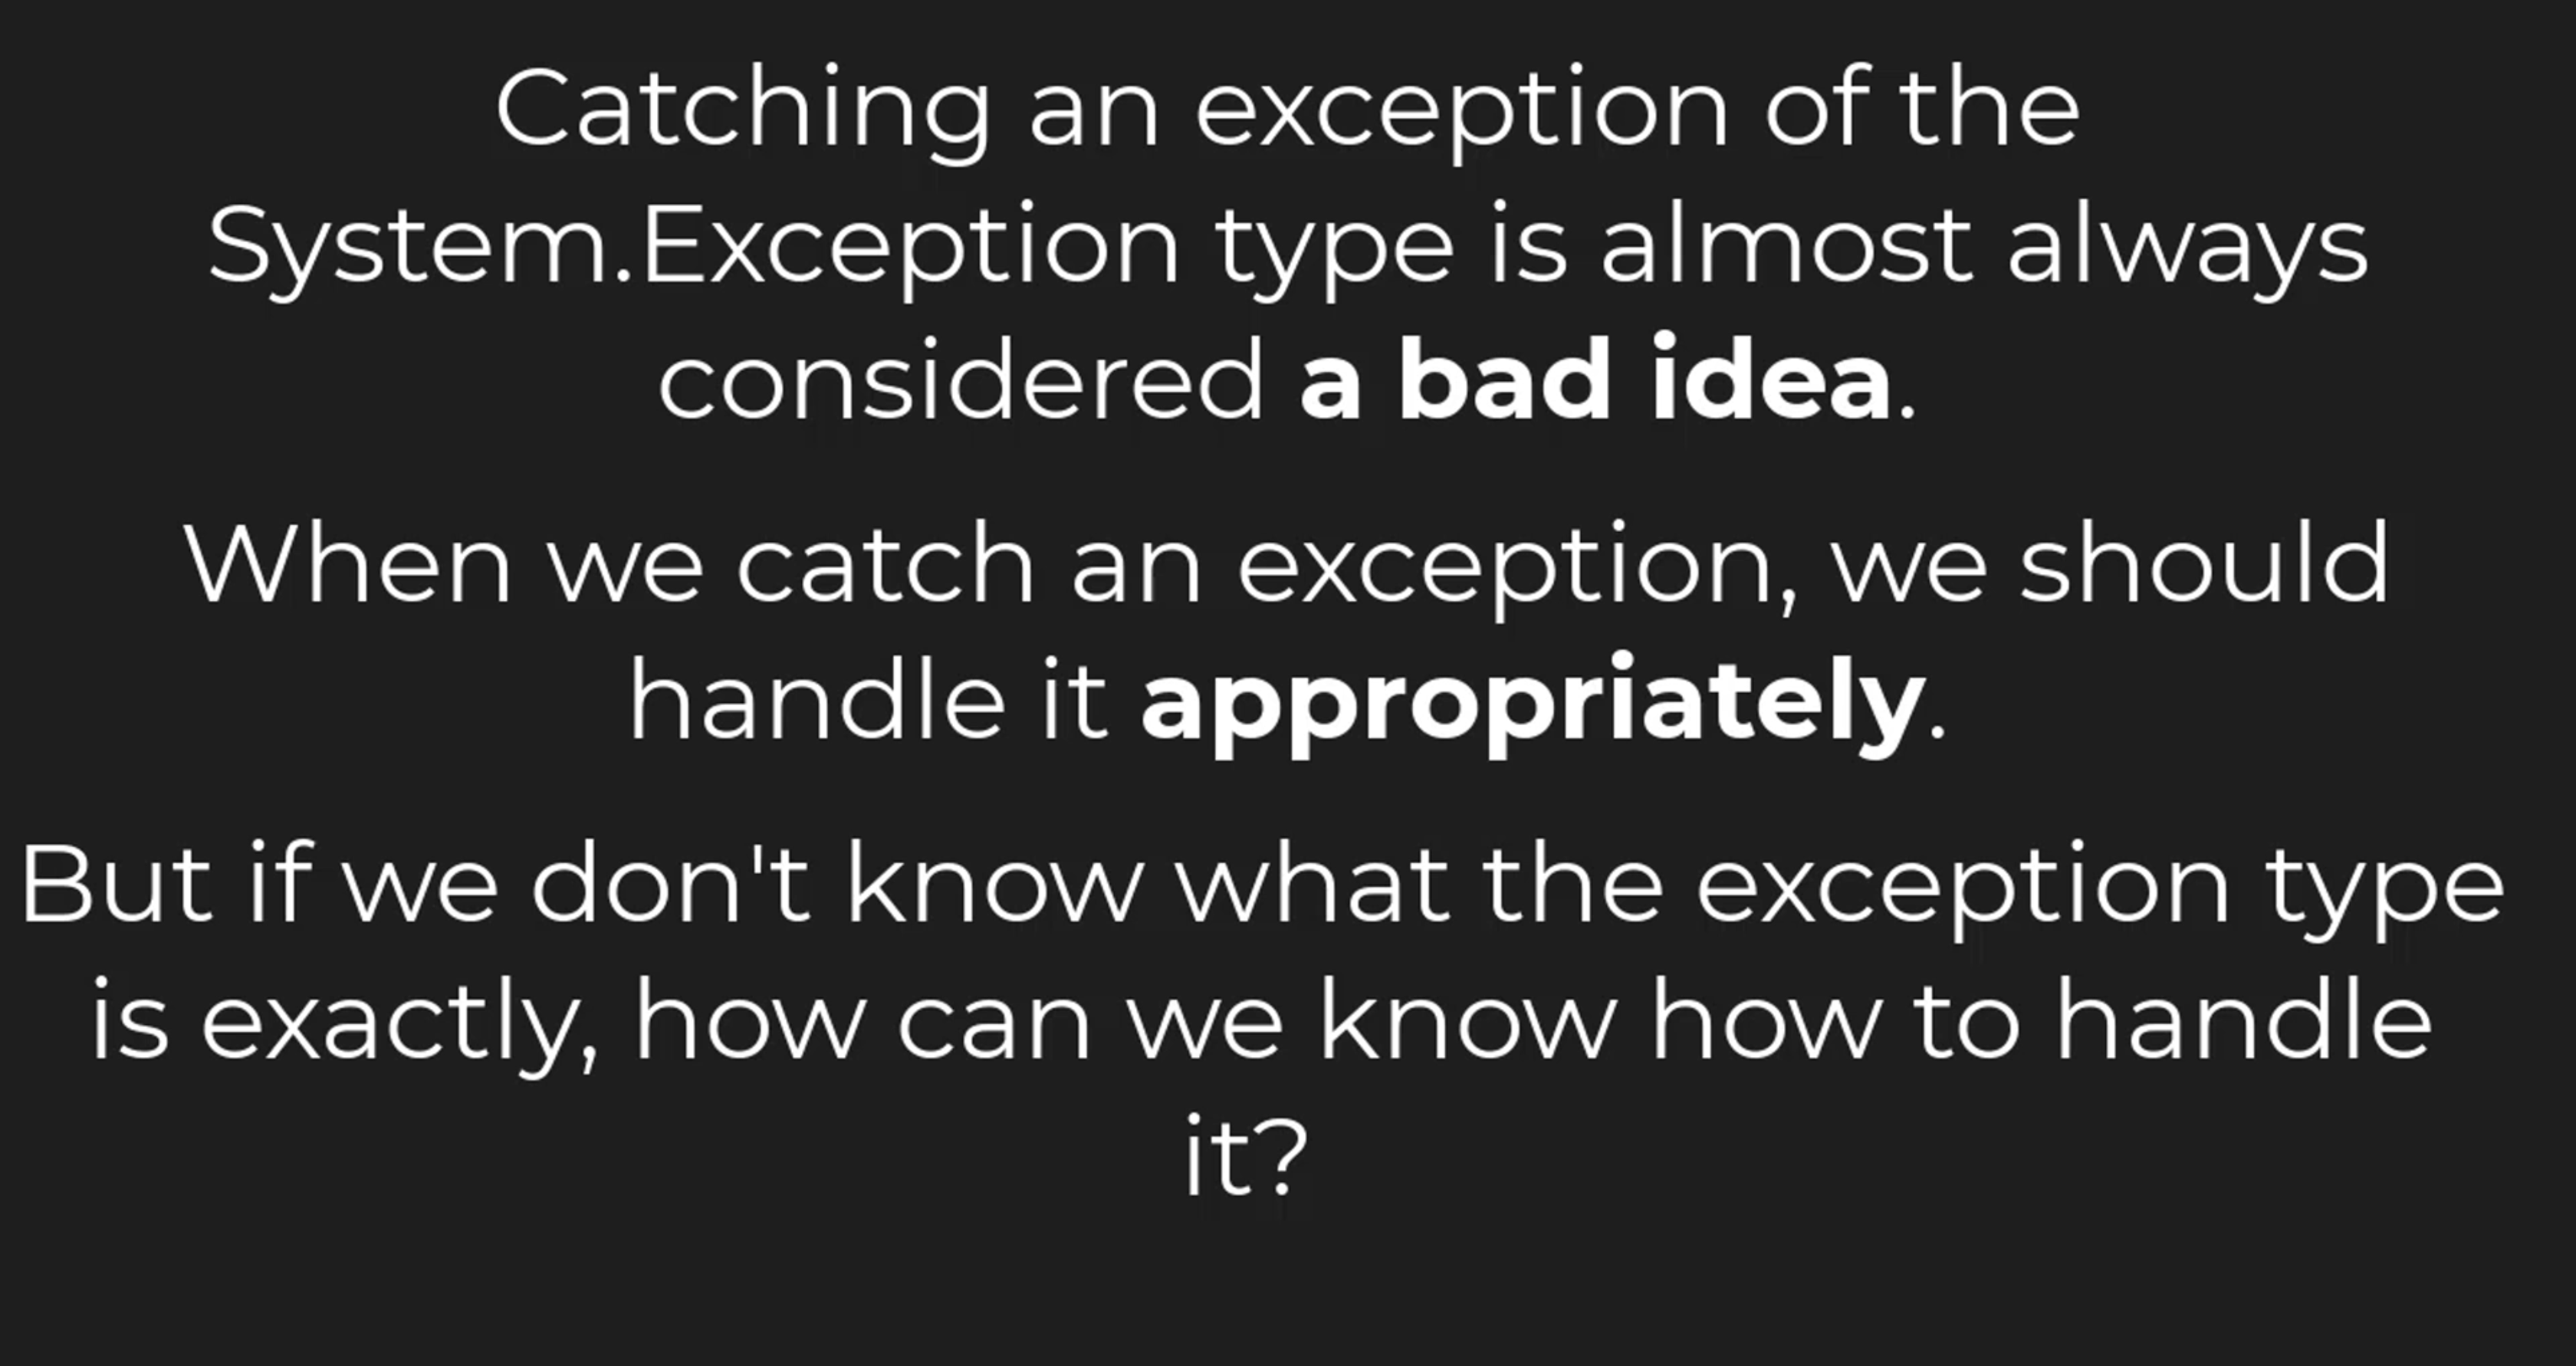

* Rethrowing Exceptions

* throw ex      vs      throw 
* throw ex will reset the stack trace. You can still preserve the stack by using inner exception.
* whereas throw will preserve the stack.

In the below scenario, it makes sense to catch the exception of type System.Exception because we are not sure what can be expected from the IPersonRepository.Read(). Here, too, we don't handle the exception but onlty catch the System.Exception 

In [ ]:
interface IPeopleRepository
{
    string Read(int id);
}

interface ILogger
{
    void log(Exception exception);
}

class PersonDataReader
{
    public readonly IPeopleRepository _peopleRepo;
    public readonly ILogger _logger;

    public PersonDataReader(IPeopleRepository repo, ILogger logger)
    {
        _peopleRepo = repo;
        _logger = logger;
    }

    public string ReadPersonData(int PersonId)
    {
        try{
           return _peopleRepo.Read(PersonId);
        }catch(Exception ex)
        {
            _logger.log(ex);
            throw;
        }

    }
}

* Global Try Catch is wrapped around the entry point of the application.